# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Call and View Data
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19329131,
            "total_supply": 19329131,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 28046.0,
                    "volume_24h": 14000203767,
                    "market_cap": 539154578515,
                    "percentage_change_1h": 0.566990533516293,
                    "percentage_change_24h": 1.27806543251364,
                    "percentage_change_7d": 3.46194942720664,
                    "percent_change_1h": 0.566990533516293,
                    "percent_change_24h": 1.27806543251364,
                    "percent_change_7d": 3.46194942720664
                }
            },
            "last_updated": 1679869197
        }
    },
    "metadata": {
        "timestamp": 1679869197,
        "num_cryptoc

In [6]:
# Call and View Data
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120452166,
            "total_supply": 120452166,
            "max_supply": 120452166,
            "quotes": {
                "USD": {
                    "price": 1775.79,
                    "volume_24h": 8304014119,
                    "market_cap": 213017030497,
                    "percentage_change_1h": 0.740218034401481,
                    "percentage_change_24h": 1.31100868313189,
                    "percentage_change_7d": 0.359606953358441,
                    "percent_change_1h": 0.740218034401481,
                    "percent_change_24h": 1.31100868313189,
                    "percent_change_7d": 0.359606953358441
                }
            },
            "last_updated": 1679869204
        }
    },
    "metadata": {
        "timestamp": 1679869204,
        

In [7]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33655.20
The current value of your 5.3 ETH is $9411.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-23", tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

open    high     low   close     volume  \
timestamp                                                              
2023-03-23 04:00:00+00:00   99.68  100.05   99.51   99.99    9949714   
2023-03-23 04:00:00+00:00  395.09  399.29  390.35  393.17  119351319   

                           trade_count        vwap symbol  
timestamp                                                  
2023-03-23 04:00:00+00:00        36031   99.705660    AGG  
2023-03-23 04:00:00+00:00       871935  394.576872    SPY

In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2023-03-23 04:00:00+00:00  99.68  100.05  99.51  99.99  9949714       36031   

                                        SPY                          \
                               vwap    open    high     low   close   
timestamp                                                             
2023-03-23 04:00:00+00:00  99.70566  395.09  399.29  390.35  393.17   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-03-23 04:00:00+00:00  119351319      871935  394.576872

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.99
Current SPY closing price: $393.17


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19658.50
The current value of your 200 AGG shares is $19998.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame([my_crypto, my_shares], columns=['Amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

Amount
crypto  43066.887
shares  39656.500

<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

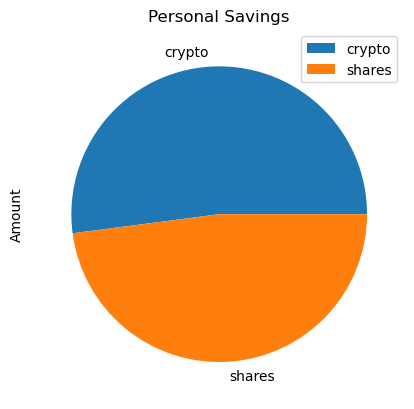

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Personal Savings')

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money for your emergency fund.')
elif total_savings == emergency_fund:
    print(f'Your savings is exactly enough for your emergency fund.')
else:
    print(f'Sorry, you do not have enough money for your emergency fund.')

Congratulations! You have enough money for your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-26', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_5y = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

stock_data_5y.head()

open    high     low   close   volume  \
timestamp                                                            
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   
2018-04-02 04:00:00+00:00  106.90  107.04  106.82  106.90  7280259   

                           trade_count        vwap symbol  
timestamp                                                  
2018-03-26 04:00:00+00:00        19722  106.583861    AGG  
2018-03-27 04:00:00+00:00        14293  106.826049    AGG  
2018-03-28 04:00:00+00:00        18689  106.978133    AGG  
2018-03-29 04:00:00+00:00        20364  107.212902    AGG  
2018-04-02 04:00:00+00:00        24906  106.927635    AGG

In [22]:
# Reorganize the DataFrame
# Separate ticker data
AGG_5y = stock_data_5y[stock_data_5y['symbol']=='AGG'].drop('symbol', axis=1)
SPY_5y = stock_data_5y[stock_data_5y['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_5y, SPY_5y], axis=1, keys=['AGG','SPY'])


# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   
2018-04-02 04:00:00+00:00  106.90  107.04  106.82  106.90  7280259   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-03-26 04:00:00+00:00       19722  106.583861  262.13  265.43  259.4100   
2018-03-27 04:00:00+00:00       14293  106.826049  266.17  266.77  258.8400   
2018-03-28 04:00:00+00:00       18689  106.978133  260.75  262.64  258.5800   
2018-03-29 04:00:00+00:00       20364  107.212902  261.12  265.26  259.8389   
2018-04-02 04:00:00+00:00       24906  106.927635  262.55  263.13  254.6700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-03-26 04:00:00+00:00  265.14  143141239      450168  262.353110  
2018-03-27 04:00:00+00:00  260.76  130806695      538201  263.145788  
2018-03-28 04:00:00+00:00  259.85  146510333      590467  260.395684  
2018-03-29 04:00:00+00:00  263.43  125470572      436558  262.835186  
2018-04-02 04:00:00+00:00  257.52  186324337      643544  258.212001

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   
2018-04-02 04:00:00+00:00  106.90  107.04  106.82  106.90  7280259   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-26 04:00:00+00:00       19722  106.583861          NaN  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   
2018-03-28 04:00:00+00:00       18689  106.978133     0.000561  260.75   
2018-03-29 04:00:00+00:00       20364  107.212902     0.002899  261.12   
2018-04-02 04:00:00+00:00       24906  106.927635    -0.003263  262.55   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2018-03-26 04:00:00+00:00  265.43  259.4100  265.14  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.8400  260.76  130806695      538201   
2018-03-28 04:00:00+00:00  262.64  258.5800  259.85  146510333      590467   
2018-03-29 04:00:00+00:00  265.26  259.8389  263.43  125470572      436558   
2018-04-02 04:00:00+00:00  263.13  254.6700  257.52  186324337      643544   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-26 04:00:00+00:00  262.353110          NaN  
2018-03-27 04:00:00+00:00  263.145788    -0.016520  
2018-03-28 04:00:00+00:00  260.395684    -0.003490  
2018-03-29 04:00:00+00:00  262.835186     0.013777  
2018-04-02 04:00:00+00:00  258.212001    -0.022435

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chelsea\Homework\APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993449  0.983662  1.004338  1.000446  1.004563  0.986152  0.999102   
2     0.996151  0.993037  0.999554  0.986837  0.988281  0.992044  1.005676   
3     1.000061  1.000273  1.009020  0.990837  0.984949  0.998458  0.990356   
4     1.015588  1.009940  0.997225  0.992072  0.991503  1.004275  0.992337   
...        ...       ...       ...       ...       ...       ...       ...   
7556  3.880643  5.058994  5.401320  5.992551  2.270342  9.542173  3.106810   
7557  3.887969  5.081307  5.336420  5.946582  2.264014  9.485922  3.077159   
7558  3.862394  5.073569  5.406902  5.975896  2.275808  9.439437  3.078388   
7559  3.866298  5.127794  5.410692  5.918519  2.273858  9.405495  3.060301   
7560  3.866999  5.080226  5.410246  5.865478  2.235393  9.402426  3.081328   

            7         8         9    ...       490       491        492  \
0      1.000000  1.000000  1.000000  ...  1.000000  1.000000   1.000000   
1      1.008043  0.984833  1.007421  ...  0.994690  0.999443   0.998270   
2      1.010903  0.981731  1.014129  ...  1.011971  0.995180   0.988401   
3      1.006283  0.981148  1.010581  ...  1.017053  1.000073   0.997646   
4      1.011316  0.993675  1.005097  ...  1.033825  1.001088   1.006191   
...         ...       ...       ...  ...       ...       ...        ...   
7556  11.319388  4.818725  5.501449  ...  1.339984  2.277035  14.492036   
7557  11.391116  4.842307  5.548404  ...  1.351869  2.290618  14.440478   
7558  11.481065  4.882844  5.610490  ...  1.359402  2.331343  14.379648   
7559  11.403727  4.828881  5.688197  ...  1.355971  2.321249  14.421542   
7560  11.447624  4.788721  5.751125  ...  1.373820  2.319035  14.511720   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006775  0.993649  0.998115  1.008983  1.011306  1.023081  1.000527  
2     1.005276  0.989126  1.000294  1.005791  1.004832  1.028681  0.996216  
3     1.003825  0.995415  0.988807  1.008859  1.012882  1.030573  0.996883  
4     1.012249  0.984238  0.981656  1.000904  1.016775  1.034606  0.984793  
...        ...       ...       ...       ...       ...       ...       ...  
7556  6.683078  2.170021  9.757088  1.987935  0.514648  6.134907  4.209000  
7557  6.736631  2.144303  9.863307  1.982073  0.516424  6.151431  4.180378  
7558  6.711879  2.136851  9.979067  1.982589  0.516026  6.159768  4.166921  
7559  6.749095  2.120070  9.966699  1.982153  0.516384  6.229652  4.181877  
7560  6.753308  2.130460  9.961713  1.972601  0.518451  6.245131  4.157851  

[7561 rows x 500 columns]

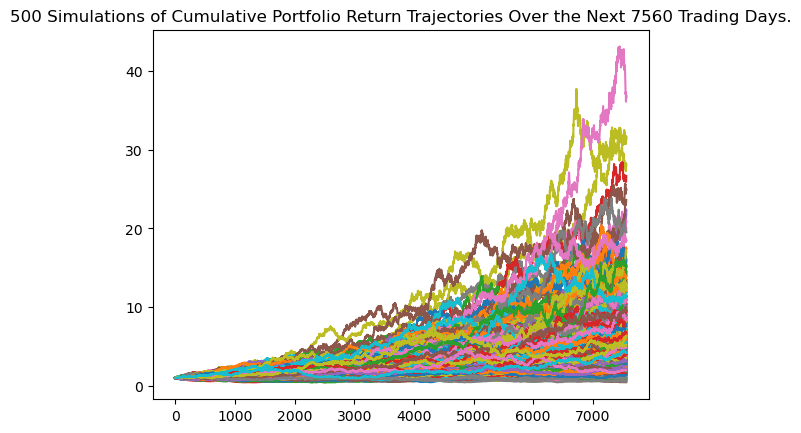

In [27]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

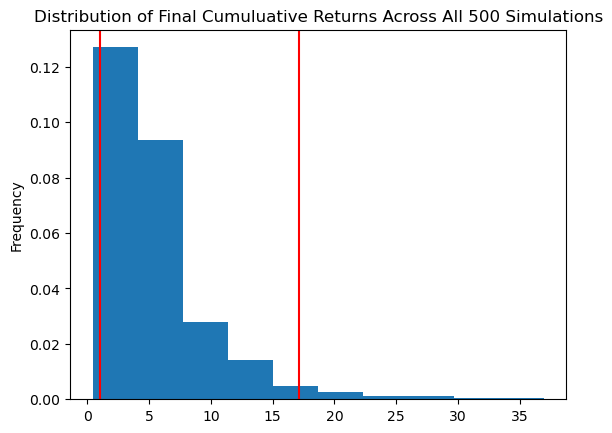

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.592804
std               4.507940
min               0.437692
25%               2.774747
50%               4.261001
75%               6.767001
max              36.950876
95% CI Lower      1.018098
95% CI Upper     17.150932
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20361.96 and $343018.63.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30542.94 and $514527.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chelsea\Homework\APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999315  1.007196  0.998304  0.995901  1.002886  0.997442  0.999337   
2     1.007643  0.997205  1.005879  0.999085  1.002702  0.994179  0.988435   
3     0.985478  1.003072  1.003049  1.006599  1.001047  0.979466  0.994778   
4     0.994936  0.995830  1.009569  1.002232  0.999862  0.977113  0.998818   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.235787  1.501031  1.307117  1.244776  1.133410  1.111655  1.344190   
1257  1.231373  1.507592  1.290545  1.242361  1.139594  1.131452  1.343514   
1258  1.238013  1.506381  1.289756  1.239909  1.126875  1.124914  1.350599   
1259  1.230938  1.508451  1.306668  1.236960  1.144145  1.130421  1.346100   
1260  1.219163  1.513204  1.321215  1.232499  1.157312  1.144676  1.350195   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000876  0.986982  1.002765  ...  0.997833  1.000678  0.982024   
2     0.994888  0.990427  0.996126  ...  0.984001  1.002106  0.983256   
3     0.998784  0.989866  0.995309  ...  0.980831  1.005678  0.983429   
4     0.999543  0.984886  0.994457  ...  0.980955  1.003676  0.983262   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.136357  1.200779  0.982230  ...  1.887131  0.905727  3.559312   
1257  2.157083  1.203687  0.992142  ...  1.886895  0.909708  3.561433   
1258  2.141576  1.193719  0.987016  ...  1.892196  0.904063  3.517844   
1259  2.126051  1.177409  0.990308  ...  1.880562  0.914777  3.522033   
1260  2.140383  1.170532  0.994106  ...  1.890983  0.918376  3.557951   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994304  0.988517  0.991888  1.003780  0.990827  1.002702  1.013599  
2     1.002027  0.993316  0.984384  1.005506  0.973882  0.995524  1.020589  
3     0.992828  1.000403  1.004396  1.000221  0.963412  0.994116  1.020391  
4     0.990702  0.993472  1.012719  0.988311  0.969165  0.999639  1.024432  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.178157  0.611674  0.795340  1.304875  2.264793  1.286720  1.305894  
1257  1.171024  0.610935  0.791759  1.317187  2.300439  1.298247  1.310117  
1258  1.166285  0.608687  0.794979  1.316232  2.304482  1.306276  1.303344  
1259  1.188897  0.607457  0.794349  1.322415  2.322362  1.305154  1.319685  
1260  1.194525  0.606911  0.782094  1.309188  2.338539  1.312129  1.326012  

[1261 rows x 500 columns]

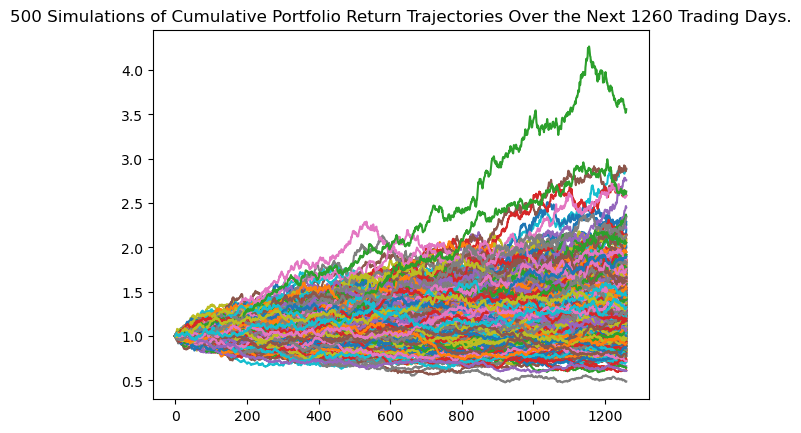

In [35]:
# Plot simulation outcomes
line_plot_5 = MC_5_year.plot_simulation()

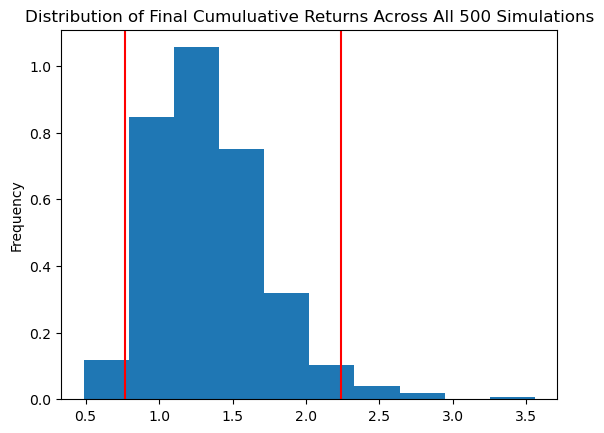

In [36]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_5_year.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.340825
std               0.388283
min               0.488531
25%               1.071891
50%               1.285067
75%               1.543740
max               3.557951
95% CI Lower      0.770030
95% CI Upper      2.235439
Name: 1260, dtype: float64


In [38]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment,2)
ci_upper_five = round(tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46201.79 and $134126.36


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Chelsea\Homework\APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.011030  1.004052  1.002236  1.009024  0.985707  0.979434  1.005016   
2     1.011534  1.001433  1.008425  1.004586  0.988558  0.993849  0.990790   
3     1.012895  0.995614  1.019692  1.004044  0.990720  0.990894  0.998338   
4     1.009978  0.985441  1.025114  0.997440  0.978721  0.999227  0.996084   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.908638  1.750249  1.484492  1.173291  1.934688  2.301852  1.914202   
2517  1.897589  1.759538  1.501056  1.169731  1.943365  2.303329  1.927563   
2518  1.912686  1.745542  1.499605  1.178609  1.935374  2.326255  1.917587   
2519  1.887306  1.748114  1.506296  1.192886  1.898676  2.355988  1.907165   
2520  1.878725  1.737820  1.518366  1.196561  1.884673  2.369954  1.911125   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.994223  0.989545  1.000569  ...  0.999559  0.995203  0.997502   
2     0.986994  0.975676  1.007420  ...  1.007627  0.995520  0.982503   
3     0.986712  0.964336  1.011898  ...  1.019931  1.010294  0.978127   
4     1.002419  0.965697  1.006063  ...  1.017181  1.008513  0.982296   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.180052  1.197696  1.363111  ...  2.368132  2.534163  1.776611   
2517  2.206140  1.189613  1.366998  ...  2.357792  2.527163  1.776720   
2518  2.200541  1.185606  1.378074  ...  2.368466  2.523346  1.761584   
2519  2.197658  1.200097  1.389090  ...  2.372197  2.513546  1.746793   
2520  2.217683  1.196601  1.387388  ...  2.404620  2.508852  1.744005   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009301  0.991072  1.002833  0.993437  0.999305  0.991343  1.000288  
2     1.020756  0.983458  0.997874  1.009433  1.010575  1.001175  0.994015  
3     1.026324  0.985222  0.990769  1.008833  1.037463  1.001722  1.000364  
4     1.035162  0.984460  0.997509  0.999873  1.034763  0.984979  1.008898  
...        ...       ...       ...       ...       ...       ...       ...  
2516  4.911984  1.583656  0.753888  3.001059  0.809675  1.766510  0.811130  
2517  4.848484  1.587004  0.755578  3.002735  0.812281  1.772106  0.826484  
2518  4.823388  1.576017  0.757017  2.950301  0.801502  1.761166  0.822366  
2519  4.914157  1.561402  0.768969  2.964107  0.790705  1.783553  0.825373  
2520  4.930787  1.525505  0.765221  2.954218  0.792980  1.797813  0.824935  

[2521 rows x 500 columns]

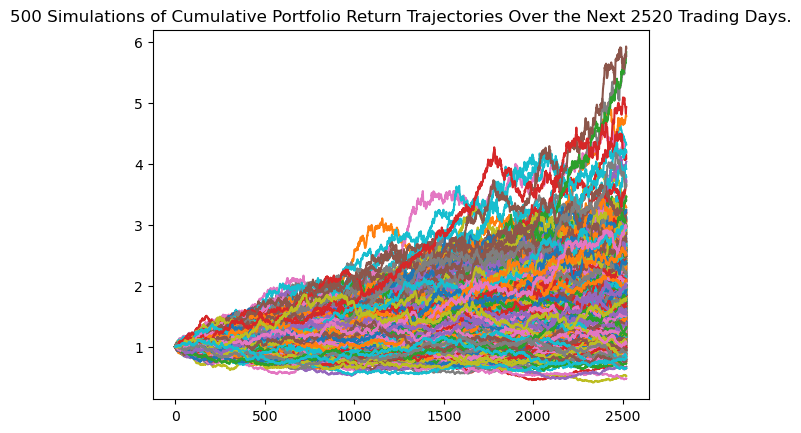

In [41]:
# Plot simulation outcomes
line_plot_10 = MC_10_year.plot_simulation()

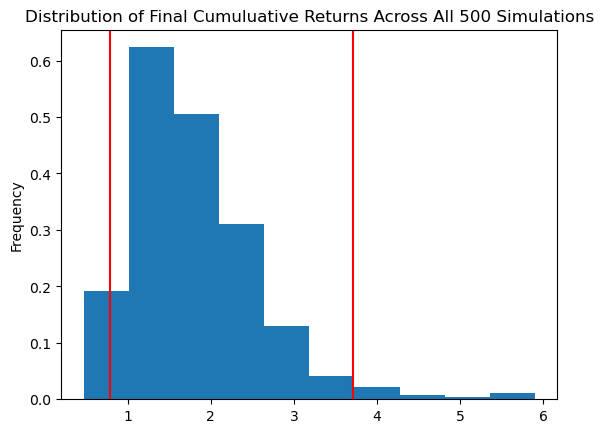

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10_year.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              1.812698
std               0.775682
min               0.475905
25%               1.262536
50%               1.668614
75%               2.181722
max               5.897316
95% CI Lower      0.792046
95% CI Upper      3.715241
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*initial_investment,2)
ci_upper_ten = round(tbl_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47522.74 and $222914.45
